<a href="https://colab.research.google.com/github/TONY00009/First-EDA-on-Playstore_Reviews/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# Importing necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



## **IMPORTING & INSPECTING DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
playstore_data_path = '/content/drive/MyDrive/Playstore EDA/Data csv/Play Store Data.csv'
user_reviews_data_path = '/content/drive/MyDrive/Playstore EDA/Data csv/User Reviews.csv'


In [ ]:
playstore_data_df = pd.read_csv(playstore_data_path)
user_reviews_df = pd.read_csv(user_reviews_data_path) 

In [ ]:
playstore_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
playstore_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
user_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## **Dealing with NULL values**

In [ ]:
# Inspecting playstore_data_df:
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Lets check the total number of null values in each column of playstore_data_df data set:
playstore_data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Inspecting user_reviews_df:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Checking the total number of null values in each column of user_reviews_df data set:
user_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### **Playstore Data**

In [ ]:
# Lets deal with playstore_data_df's NULL values first:

# function to replace null values with median:
def fill_median(columns):
  columns = columns.fillna(columns.median())
  return columns

In [ ]:
# Applying function to playstore_data_df's 'Rating' column:

playstore_data_df['Rating'] = playstore_data_df['Rating'].transform(fill_median)

In [ ]:
# Mode values of remaining columns with NULL values:

print(playstore_data_df['Type'].mode())
print(playstore_data_df['Current Ver'].mode())
print(playstore_data_df['Android Ver'].mode())
print(playstore_data_df['Content Rating'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Everyone
dtype: object


In [ ]:
# Replacing these columns with their respective Mode value:

# Filling Null values with mode:
playstore_data_df['Type'].fillna(playstore_data_df['Type'].mode()[0], inplace=True)
playstore_data_df['Current Ver'].fillna(playstore_data_df['Current Ver'].mode()[0], inplace=True)
playstore_data_df['Android Ver'].fillna(playstore_data_df['Android Ver'].mode()[0], inplace=True)
playstore_data_df['Content Rating'].fillna(playstore_data_df['Content Rating'].mode()[0], inplace=True)

In [ ]:
playstore_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **User Reviews Data**

In [ ]:
#Dropping null values from user_reviews_df:

user_reviews_df = user_reviews_df.dropna()
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64



---



## **Checking Box-Plot**

### **For Playstore Data**

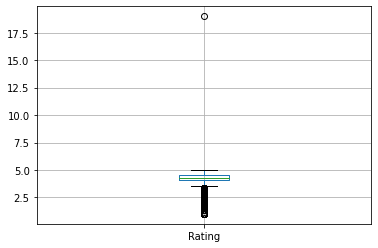

In [ ]:
# Plotting Box-Plot:

playstore_data_df.boxplot();

In [ ]:
# Checking for outlier:

playstore_data_df[playstore_data_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


We can see that this specific row is having a lot of messed up data values not only in terms of an outlier for 'Rating' column but also for 'Genres' , 'Size' , 'Type' and many more .Hence we cannot gather any useful intel from this row therefore delering this row would be fine. 

In [ ]:
# Dropping the row containing outlier:

playstore_data_df.drop([10472],inplace = True) 

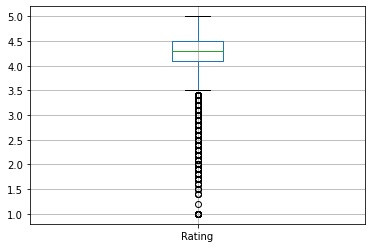

In [ ]:
# Checking Box-Pot after removing Outlier:

playstore_data_df.boxplot();

### **For User Review Data**

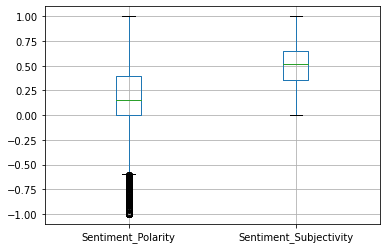

In [ ]:
user_reviews_df.boxplot();

Now, the box-plot of both the data sets look fair enough to spot mean, min, max or other quantile values.


## **Converting the  Data Types of required columns to suitable formats to continue our EDA**

In [ ]:
playstore_data_df.head()

In [ ]:
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Converting 'Reviews' column to int data type: 

playstore_data_df['Reviews'] = playstore_data_df['Reviews'].astype(int)
playstore_data_df['Reviews'].dtype

dtype('int64')

In [ ]:
# Converting 'Installs' column to int data type: 

playstore_data_df['Installs'] = playstore_data_df['Reviews'].astype(int)
playstore_data_df['Installs'].dtype

dtype('int64')

In [ ]:
# Experimenting:
df['Price'].unique()

In [ ]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))


In [ ]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')



---



In [ ]:
playstore_data_df.info()

## DUPLICATES

In [ ]:
# Looking for duplicates in both data sets:

# For playstore_data_df:
playstore_identical_data = playstore_data_df.duplicated()
print(f'The number of duplicates in playstore_data_df data set are: {playstore_identical_data.sum()}')


# For user_reviews_df:
user_reviews_identical_data = user_reviews_df.duplicated()
print(f'The number of duplicates in user_reviews_df data set are: {user_reviews_identical_data.sum()}')


The number of duplicates in playstore_data_df data set are: 483
The number of duplicates in user_reviews_df data set are: 7735


In [ ]:
# Shapes of both data sets before dropping duplicates:

print(f'{playstore_data_df.shape}')
print(f'{user_reviews_df.shape}')

(10841, 13)
(37427, 5)


In [ ]:
#Remove Duplicates from Both data sets:

# For playstore_data_df data set:
playstore_data_df1 = playstore_data_df.drop_duplicates() 

# For user_reviews_df data set:
user_reviews_df1 = user_reviews_df.drop_duplicates() 


In [ ]:
# Shapes of both data sets after dropping duplicates:

print(f'{playstore_data_df1.shape}')
print(f'{user_reviews_df1.shape}')

(10358, 13)
(29692, 5)




---

